In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [49]:
# Read weather data and energy data
weather = pd.read_csv('Daily_NY_weather2021.csv')
energy = pd.read_csv('energy_output_2021.csv')

#### WEATHER

In [50]:
weather.head()

,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
0,New York State,2021-01-01T00:00:00,32.4,29.7,24.0,70.72,0.0,0,NaN,0.0,...,1031.3,81.2,9.9,0.0,NaN,0,NaN,Partially cloudy,partly-cloudy-night,"71752099999,72528014733,KGVQ,KIAG,72528704724,..."
1,New York State,2021-01-01T01:00:00,32.5,32.5,24.1,70.76,0.0,0,NaN,0.0,...,1031.4,93.7,9.9,0.0,NaN,0,NaN,Overcast,cloudy,"71752099999,72528014733,KGVQ,KIAG,72528704724,..."
2,New York State,2021-01-01T02:00:00,31.6,28.3,24.2,73.84,0.0,0,NaN,0.0,...,1031.6,100.0,9.9,0.0,NaN,0,NaN,Overcast,cloudy,"71752099999,72528014733,KGVQ,KIAG,72528704724,..."
3,New York State,2021-01-01T03:00:00,31.6,26.8,25.1,76.66,0.0,0,NaN,0.0,...,1032.1,100.0,9.9,0.0,NaN,0,NaN,Overcast,cloudy,"71752099999,72528014733,KGVQ,KIAG,72528704724,..."
4,New York State,2021-01-01T04:00:00,31.8,27.2,25.2,76.31,0.0,0,NaN,0.0,...,1032.0,100.0,9.9,0.0,NaN,0,NaN,Overcast,cloudy,"71752099999,72528014733,KGVQ,KIAG,72528704724,..."


##### Missing values

In [51]:
# percentage of missing values by column
weather.isna().sum()/weather.shape[0]

name                0.000000
datetime            0.000000
temp                0.000000
feelslike           0.000000
dew                 0.000000
humidity            0.000000
precip              0.000000
precipprob          0.000000
preciptype          0.893493
snow                0.000000
snowdepth           0.000000
windgust            0.739384
windspeed           0.000000
winddir             0.000000
sealevelpressure    0.000000
cloudcover          0.000000
visibility          0.000000
solarradiation      0.000000
solarenergy         0.413927
uvindex             0.000000
severerisk          1.000000
conditions          0.000000
icon                0.000000
stations            0.000000
dtype: float64

In [52]:
#preciptype has 89% missing values, let's explore why
print(weather.precipprob.value_counts())
print(weather.preciptype.unique())
weather[["precipprob", "preciptype"]]

0      7827
100     933
Name: precipprob, dtype: int64
[nan 'rain,snow' 'rain' 'snow']


,precipprob,preciptype
0,0,NaN
1,0,NaN
2,0,NaN
3,0,NaN
4,0,NaN
...,...,...
8755,0,NaN
8756,0,NaN
8757,0,NaN
8758,0,NaN


In [53]:
#if precipprob is 0, then preciptype is NaN
weather[weather.precipprob == 0].preciptype.unique()
#we input the nan values with "No precipitation"
weather.preciptype.fillna("No precipitation", inplace=True)

In [54]:
#windgust is nan 74% of the time, let's explore why
weather.windgust.value_counts()

20.8    171
21.9    139
23.0    126
19.7     86
24.2     82
       ... 
35.0      1
19.3      1
40.3      1
17.3      1
39.2      1
Name: windgust, Length: 257, dtype: int64

In [55]:
#correlation between windgust, windspeed and winddir
weather[["windgust", "windspeed", "winddir"]].corr()

,windgust,windspeed,winddir
windgust,1.000000,0.780338,0.126404
windspeed,0.780338,1.000000,0.131554
winddir,0.126404,0.131554,1.000000


Text(0, 0.5, 'windgust')

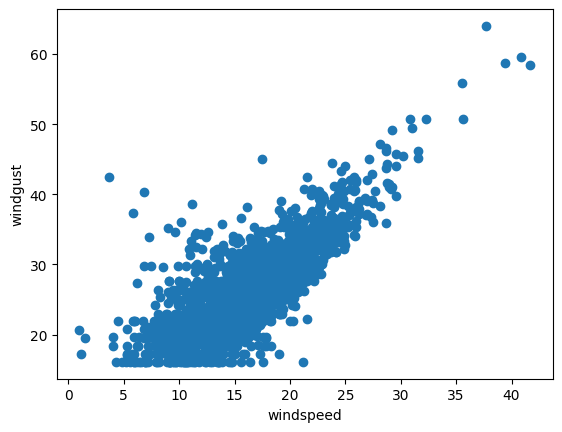

In [56]:
#plot correlation between windspeed and windgust
plt.scatter(weather.windspeed, weather.windgust)
plt.xlabel("windspeed")
plt.ylabel("windgust")

In [57]:
#windgust is highly correlated with windspeed, so we can drop windgust
weather.drop("windgust", axis=1, inplace=True)

In [58]:
#we can drop severerisk because 100% of the values are nan
weather.drop("severerisk", axis=1, inplace=True)

In [59]:
#solarenergy is nan 40% of the time, let's explore why
weather[["solarenergy", "solarradiation", "cloudcover", "uvindex"]].corr()

,solarenergy,solarradiation,cloudcover,uvindex
solarenergy,1.000000,0.999504,-0.329067,0.993716
solarradiation,0.999504,1.000000,-0.193214,0.995570
cloudcover,-0.329067,-0.193214,1.000000,-0.192015
uvindex,0.993716,0.995570,-0.192015,1.000000


In [60]:
#solar energy is highly correlated with solarradiation and uvindex, so we can drop solarenergy
weather.drop("solarenergy", axis=1, inplace=True)

##### Categorical variables

In [80]:
#filter by icon and see values in icon
print(weather[weather.icon == "partly-cloudy-night"]["conditions"].unique())
print(weather[weather.icon == "partly-cloudy-day"]["conditions"].unique())
print(weather[weather.icon == "cloudy"]["conditions"].unique())
print(weather[weather.icon == "snow"]["conditions"].unique())
print(weather[weather.icon == "rain"]["conditions"].unique())
print(weather[weather.icon == "clear-night"]["conditions"].unique())
print(weather[weather.icon == "clear-day"]["conditions"].unique())
print(weather[weather.icon == "wind"]["conditions"].unique())
print(weather[weather.icon == "fog"]["conditions"].unique())

['Partially cloudy']
['Partially cloudy']
['Overcast']
['Partially cloudy' 'Snow, Rain, Overcast' 'Overcast' 'Snow, Overcast'
 'Snow, Partially cloudy' 'Clear' 'Snow' 'Rain, Overcast']
['Snow, Rain, Overcast' 'Snow, Rain, Partially cloudy' 'Rain, Overcast'
 'Rain, Partially cloudy']
['Clear']
['Clear']
['Partially cloudy' 'Overcast' 'Clear']
['Overcast' 'Partially cloudy' 'Clear']


In [74]:
#weather conditions unique
weather.conditions.unique()
weather.icon.unique()

array(['partly-cloudy-night', 'cloudy', 'partly-cloudy-day', 'snow',
       'rain', 'clear-day', 'clear-night', 'wind', 'fog'], dtype=object)

In [61]:
print(weather.shape, energy.shape)

(8760, 21) (8759, 12)


In [62]:
#transform datetime into date with hour in weather data
weather['Datetime'] = pd.to_datetime(weather['datetime'])
#drop first two columns
weather = weather.drop(['datetime','name'], axis=1)
weather.head()

,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,snowdepth,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,uvindex,conditions,icon,stations,Datetime
0,32.4,29.7,24.0,70.72,0.0,0,No precipitation,0.0,0.39,3.1,246.0,1031.3,81.2,9.9,0.0,0,Partially cloudy,partly-cloudy-night,"71752099999,72528014733,KGVQ,KIAG,72528704724,...",2021-01-01 00:00:00
1,32.5,32.5,24.1,70.76,0.0,0,No precipitation,0.0,0.34,0.1,353.0,1031.4,93.7,9.9,0.0,0,Overcast,cloudy,"71752099999,72528014733,KGVQ,KIAG,72528704724,...",2021-01-01 01:00:00
2,31.6,28.3,24.2,73.84,0.0,0,No precipitation,0.0,0.30,3.4,143.0,1031.6,100.0,9.9,0.0,0,Overcast,cloudy,"71752099999,72528014733,KGVQ,KIAG,72528704724,...",2021-01-01 02:00:00
3,31.6,26.8,25.1,76.66,0.0,0,No precipitation,0.0,0.25,4.8,171.0,1032.1,100.0,9.9,0.0,0,Overcast,cloudy,"71752099999,72528014733,KGVQ,KIAG,72528704724,...",2021-01-01 03:00:00
4,31.8,27.2,25.2,76.31,0.0,0,No precipitation,0.0,0.20,4.5,118.0,1032.0,100.0,9.9,0.0,0,Overcast,cloudy,"71752099999,72528014733,KGVQ,KIAG,72528704724,...",2021-01-01 04:00:00


#### ENERGY

In [63]:
energy.head()

,Datetime,Day,Month,Hour,Year,Dual Fuel_Gen_MW,Hydro_Gen_MW,Natural Gas_Gen_MW,Nuclear_Gen_MW,Other Fossil Fuels_Gen_MW,Solar_Gen_MW,Wind_Gen_MW
0,2021-01-01 00:00:00,1,1,0,2021,41056.0,41107.0,22286.0,57182.0,26.0,3389.0,756.0
1,2021-01-01 01:00:00,1,1,1,2021,35983.0,33858.0,19245.0,52781.0,24.0,3128.0,881.0
2,2021-01-01 02:00:00,1,1,2,2021,30889.0,35901.0,17772.0,52784.0,24.0,3124.0,321.0
3,2021-01-01 03:00:00,1,1,3,2021,31933.0,35001.0,17963.0,52784.0,24.0,3123.0,372.0
4,2021-01-01 04:00:00,1,1,4,2021,32922.0,35943.0,18005.0,52784.0,24.0,3118.0,670.0


In [64]:
energy.dtypes

Datetime                      object
Day                            int64
Month                          int64
Hour                           int64
Year                           int64
Dual Fuel_Gen_MW             float64
Hydro_Gen_MW                 float64
Natural Gas_Gen_MW           float64
Nuclear_Gen_MW               float64
Other Fossil Fuels_Gen_MW    float64
Solar_Gen_MW                 float64
Wind_Gen_MW                  float64
dtype: object

In [65]:
#transform datetime into date with hour in energy data
energy['Datetime'] = pd.to_datetime(energy['Datetime'])

In [66]:
#merge weather and energy data by datetime
merged_data = pd.merge(energy, weather, on='Datetime')
merged_data.head()

,Datetime,Day,Month,Hour,Year,Dual Fuel_Gen_MW,Hydro_Gen_MW,Natural Gas_Gen_MW,Nuclear_Gen_MW,Other Fossil Fuels_Gen_MW,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,uvindex,conditions,icon,stations
0,2021-01-01 00:00:00,1,1,0,2021,41056.0,41107.0,22286.0,57182.0,26.0,...,3.1,246.0,1031.3,81.2,9.9,0.0,0,Partially cloudy,partly-cloudy-night,"71752099999,72528014733,KGVQ,KIAG,72528704724,..."
1,2021-01-01 01:00:00,1,1,1,2021,35983.0,33858.0,19245.0,52781.0,24.0,...,0.1,353.0,1031.4,93.7,9.9,0.0,0,Overcast,cloudy,"71752099999,72528014733,KGVQ,KIAG,72528704724,..."
2,2021-01-01 02:00:00,1,1,2,2021,30889.0,35901.0,17772.0,52784.0,24.0,...,3.4,143.0,1031.6,100.0,9.9,0.0,0,Overcast,cloudy,"71752099999,72528014733,KGVQ,KIAG,72528704724,..."
3,2021-01-01 03:00:00,1,1,3,2021,31933.0,35001.0,17963.0,52784.0,24.0,...,4.8,171.0,1032.1,100.0,9.9,0.0,0,Overcast,cloudy,"71752099999,72528014733,KGVQ,KIAG,72528704724,..."
4,2021-01-01 04:00:00,1,1,4,2021,32922.0,35943.0,18005.0,52784.0,24.0,...,4.5,118.0,1032.0,100.0,9.9,0.0,0,Overcast,cloudy,"71752099999,72528014733,KGVQ,KIAG,72528704724,..."


In [67]:
merged_data.shape

(8760, 31)

In [68]:
#merged data unique values for each column
merged_data.nunique()

Datetime                     8759
Day                            31
Month                          12
Hour                           24
Year                            1
Dual Fuel_Gen_MW             8028
Hydro_Gen_MW                 7434
Natural Gas_Gen_MW           7979
Nuclear_Gen_MW               4037
Other Fossil Fuels_Gen_MW    1112
Solar_Gen_MW                 1466
Wind_Gen_MW                  6424
temp                          756
feelslike                     937
dew                           715
humidity                     4464
precip                        153
precipprob                      2
preciptype                      4
snow                           22
snowdepth                     745
windspeed                     273
winddir                       362
sealevelpressure              409
cloudcover                    275
visibility                     95
solarradiation                969
uvindex                        11
conditions                     10
icon          

In [69]:
merged_data.dtypes

Datetime                     datetime64[ns]
Day                                   int64
Month                                 int64
Hour                                  int64
Year                                  int64
Dual Fuel_Gen_MW                    float64
Hydro_Gen_MW                        float64
Natural Gas_Gen_MW                  float64
Nuclear_Gen_MW                      float64
Other Fossil Fuels_Gen_MW           float64
Solar_Gen_MW                        float64
Wind_Gen_MW                         float64
temp                                float64
feelslike                           float64
dew                                 float64
humidity                            float64
precip                              float64
precipprob                            int64
preciptype                           object
snow                                float64
snowdepth                           float64
windspeed                           float64
winddir                         

In [70]:
merged_data.shape[0]

8760

In [71]:
#percentage of missing values in each column
merged_data.isna().sum()/merged_data.shape[0]

Datetime                     0.0
Day                          0.0
Month                        0.0
Hour                         0.0
Year                         0.0
Dual Fuel_Gen_MW             0.0
Hydro_Gen_MW                 0.0
Natural Gas_Gen_MW           0.0
Nuclear_Gen_MW               0.0
Other Fossil Fuels_Gen_MW    0.0
Solar_Gen_MW                 0.0
Wind_Gen_MW                  0.0
temp                         0.0
feelslike                    0.0
dew                          0.0
humidity                     0.0
precip                       0.0
precipprob                   0.0
preciptype                   0.0
snow                         0.0
snowdepth                    0.0
windspeed                    0.0
winddir                      0.0
sealevelpressure             0.0
cloudcover                   0.0
visibility                   0.0
solarradiation               0.0
uvindex                      0.0
conditions                   0.0
icon                         0.0
stations  

In [ ]:
#download merged data into csv
merged_data.to_csv('final_data.csv', index=False)